# Performing Exploratory Data Analysis to discover the country or region with the most terrorist attacks.

## We will perform Data Analysis first to understand the data and then visualize it. 

# 1- Data Analysis

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv(r'C:\Users\Remon\Desktop\Work\TSF\global_terrorsim.csv', encoding = 'latin-1')
df.head()

C:\Users\Remon\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [100]:
df.shape

(181691, 135)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [102]:
#shows all columns (features)
pd.set_option('display.max_rows', None)

In [103]:
df.dtypes

eventid               float64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [104]:
#shows percentage of null values in each column (feature)
df.isnull().sum() * 100 / len(df)

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [105]:
#Picking out the important or relevant features that we will actually use, since there are multiple irrelevant columns. Then, 
#updating our dataframe.
relevant_features = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'latitude', 'longitude', 'gname',
                     'summary', 'weaptype1', 'attacktype1_txt', 'nwound', 'motive', 'targtype1_txt', 'target1', 'nkill',
                     'success']
df = df[relevant_features]

In [106]:
#Renaming the features for them to make sense.
df.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'provstate':'State', 
                     'region_txt':'Region', 'attacktype1_txt':'AttackType', 'target1':'Target', 'success':'Success',
                     'nkill':'Killed', 'nwound':'Wounded', 'summary':'Summary', 'gname':'Group', 'targtype1_txt':'Target_type',
                     'weaptype1':'Weapon_type', 'motive':'Motive'}, inplace=True)

In [107]:
#showing updated dataframe.
df.head()

,Year,Month,Day,Country,Region,State,latitude,longitude,Group,Summary,Weapon_type,AttackType,Wounded,Motive,Target_type,Target,Killed,Success
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,MANO-D,NaN,13,Assassination,0.0,NaN,Private Citizens & Property,Julio Guzman,1.0,1
1,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,23rd of September Communist League,NaN,13,Hostage Taking (Kidnapping),0.0,NaN,Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,Unknown,NaN,13,Assassination,0.0,NaN,Journalists & Media,Employee,1.0,1
3,1970,1,0,Greece,Western Europe,Attica,37.997490,23.762728,Unknown,NaN,6,Bombing/Explosion,NaN,NaN,Government (Diplomatic),U.S. Embassy,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Unknown,NaN,8,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),U.S. Consulate,NaN,1


In [108]:
df.shape

(181691, 18)

In [109]:
df.describe()

,Year,Month,Day,latitude,longitude,Weapon_type,Wounded,Killed,Success
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,165380.000000,171378.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,6.447325,3.167668,2.403272,0.889598
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,2.173435,35.949392,11.545741,0.313391
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,5.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,6.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,6.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,13.000000,8191.000000,1570.000000,1.000000


In [110]:
#showing Correlation dataframe.
df.corr()

,Year,Month,Day,latitude,longitude,Weapon_type,Wounded,Killed,Success
Year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.011737,0.015273,0.015341,-0.082963
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.007863,0.002938,0.003463,-0.002845
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003019,-0.001268,-0.003693,-0.011802
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.011710,0.015988,-0.018124,-0.073715
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,0.001582,0.000223,-0.000562,-0.000858
Weapon_type,-0.011737,0.007863,-0.003019,-0.011710,0.001582,1.000000,-0.009799,0.004038,-0.008178
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,-0.009799,1.000000,0.534375,0.025804
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.004038,0.534375,1.000000,0.053115
Success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,-0.008178,0.025804,0.053115,1.000000


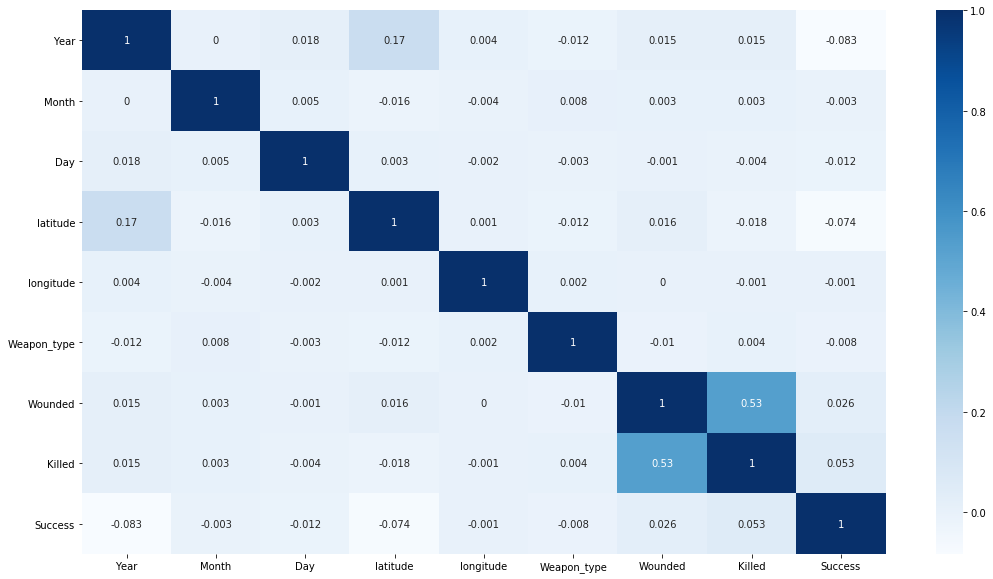

In [111]:
#Visualizing correlation matrix.
plt.figure(figsize=(18, 10))
sns.heatmap(np.round(df.corr(), 3), annot = True, cmap = 'Blues')

# 2- Data Visualization

- Here we are trying to know which country and region have suffered the most terrorist attacks.

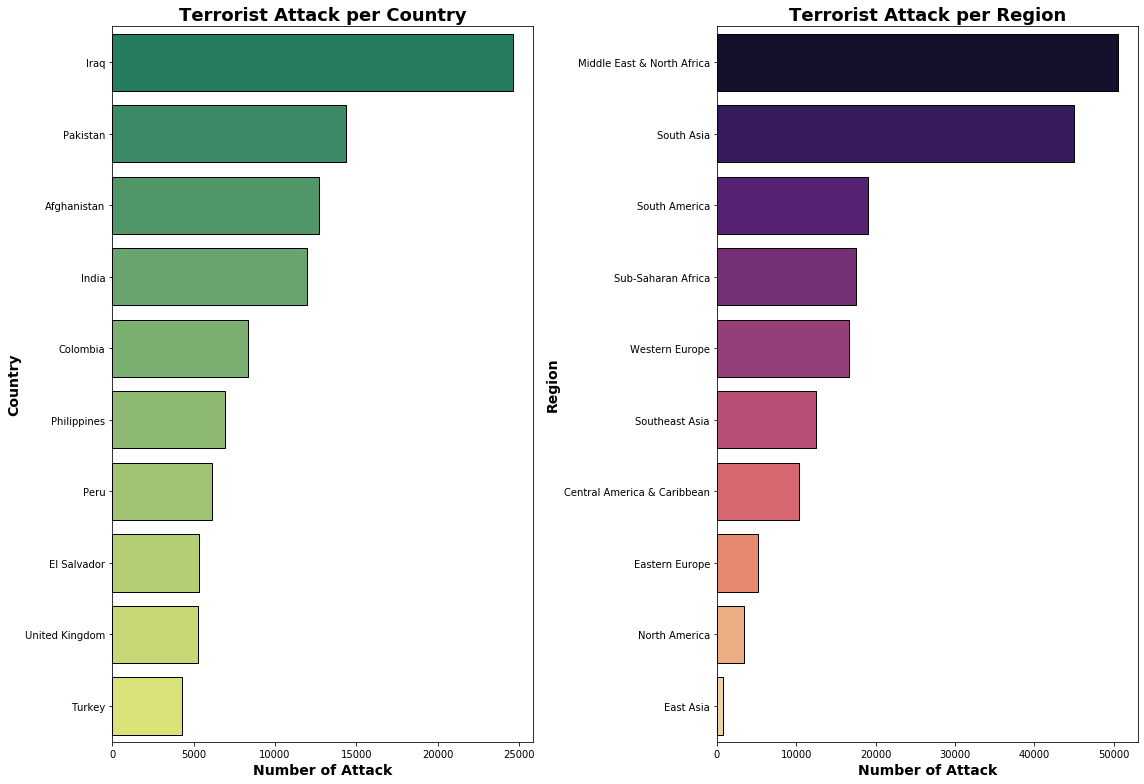

In [112]:
fig, axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y = df['Country'].value_counts()[0 : 10].index, x = df['Country'].value_counts()[0 : 10].values, palette = 'summer',
            ax = axes[0], edgecolor = 'black' )
axes[0].set_title('Terrorist Attack per Country', fontweight = 'bold', fontsize = 18)
axes[0].set_xlabel('Number of Attack', fontweight = 'bold', fontsize = 14)
axes[0].set_ylabel('Country', fontweight = 'bold', fontsize = 14)


sns.barplot(y = df['Region'].value_counts()[0 : 10].index, x = df['Region'].value_counts()[0 : 10].values, palette = 'magma',
            ax = axes[1], edgecolor='black')
axes[1].set_xlabel('Number of Attack', fontweight = 'bold', fontsize = 14)
axes[1].set_ylabel('Region', fontweight = 'bold', fontsize = 14)
axes[1].set_title('Terrorist Attack per Region', fontweight = 'bold', fontsize = 18)
fig.tight_layout()
plt.show()

Conclusion: It's apparent that Iraq is the country that suffered the most number of attacks followed by Pakistan and Afghanistan. Also, we can see that the Middle East & North Africa region have suffered the most number of attacks followed by South Asia and South America.

- Here, we are trying to find the most active group of terrorists. 

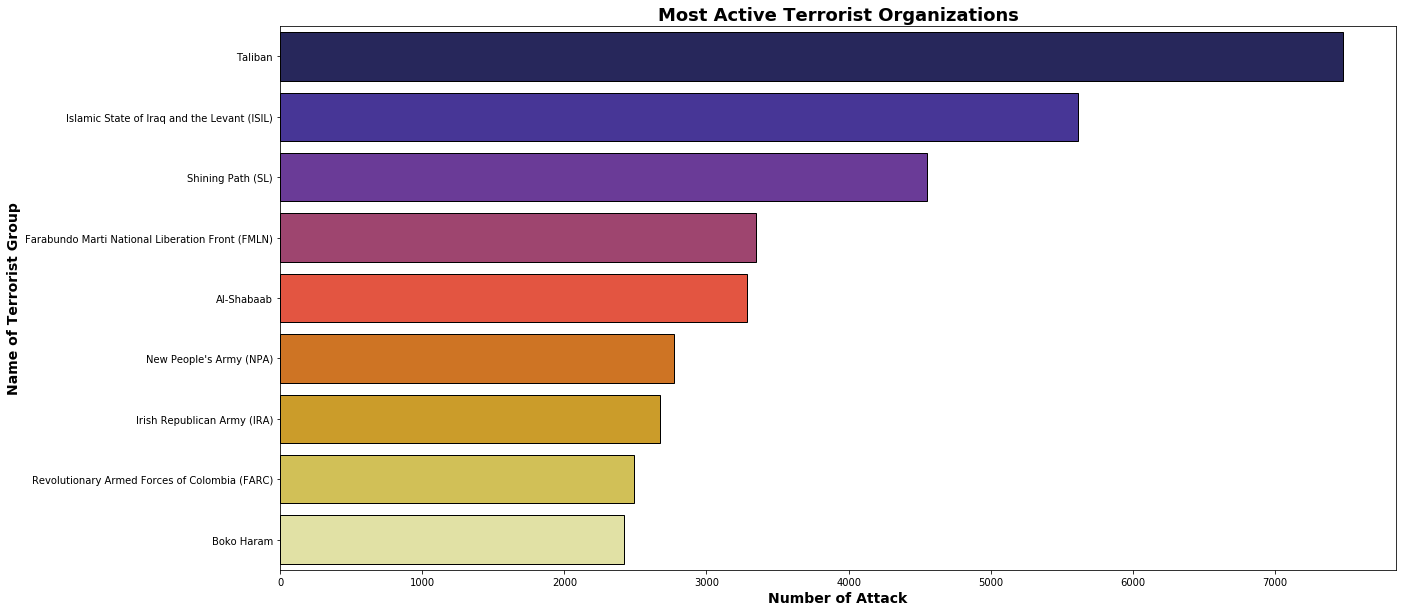

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(y = df['Group'].value_counts()[1 : 10].index, x = df['Group'].value_counts()[1 : 10].values,
           palette = 'CMRmap', edgecolor = 'black')
plt.xlabel('Number of Attack', fontweight = 'bold', fontsize = 14)
plt.ylabel('Name of Terrorist Group', fontweight = 'bold', fontsize = 14)
plt.title('Most Active Terrorist Organizations', fontweight = 'bold', fontsize = 18)
plt.show()

Conclusion: It appears that Taliban is the most active terrorist group followed by Islamic State of Iraq. 

- Here, we are trying to find the type of attacks. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

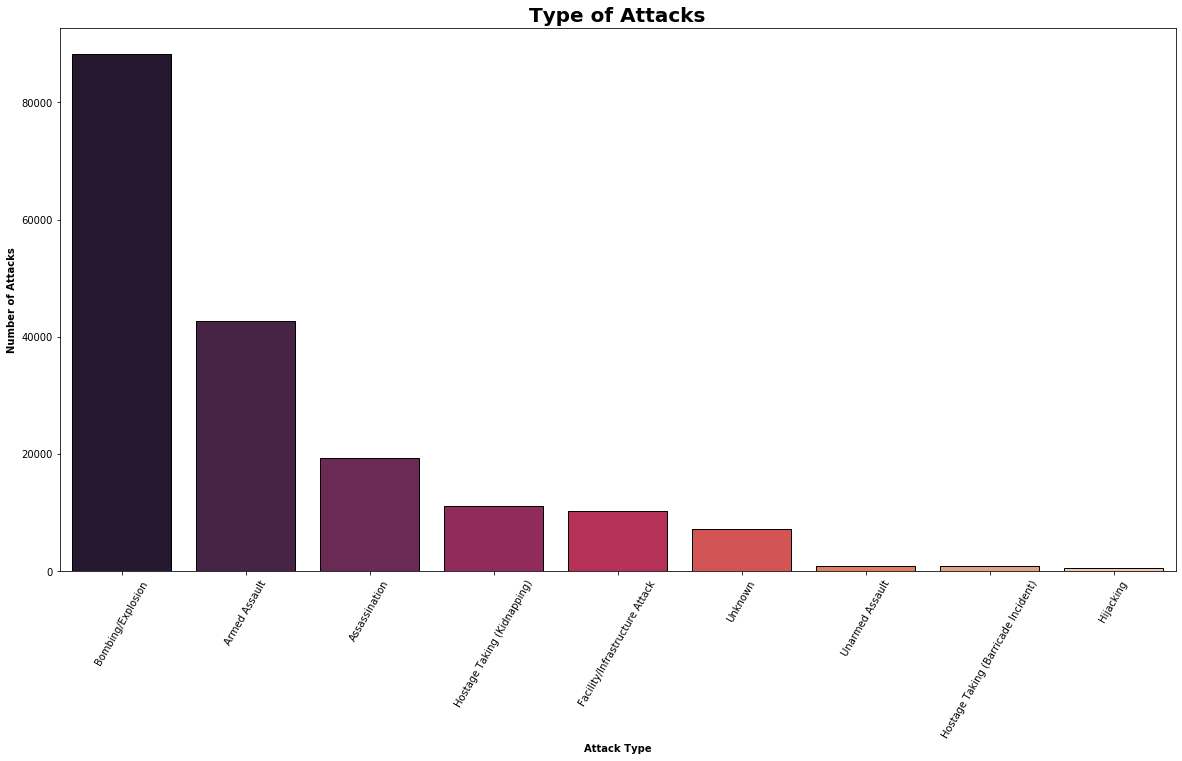

In [114]:
plt.figure(figsize = (20 , 10))
sns.countplot(df['AttackType'], order = df['AttackType'].value_counts().index, edgecolor='k', palette='rocket')
plt.xlabel('Attack Type', fontweight = 'bold')
plt.ylabel('Number of Attacks', fontweight = 'bold')
plt.title('Type of Attacks', fontweight = 'bold', fontsize = 20)
plt.xticks(rotation = 60)

Conclusion: It appears that Bombing/Explosion is the most type of attack going on, followed by Armed Assault, and Assassination. 

- Here, we are trying to find the type of target. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

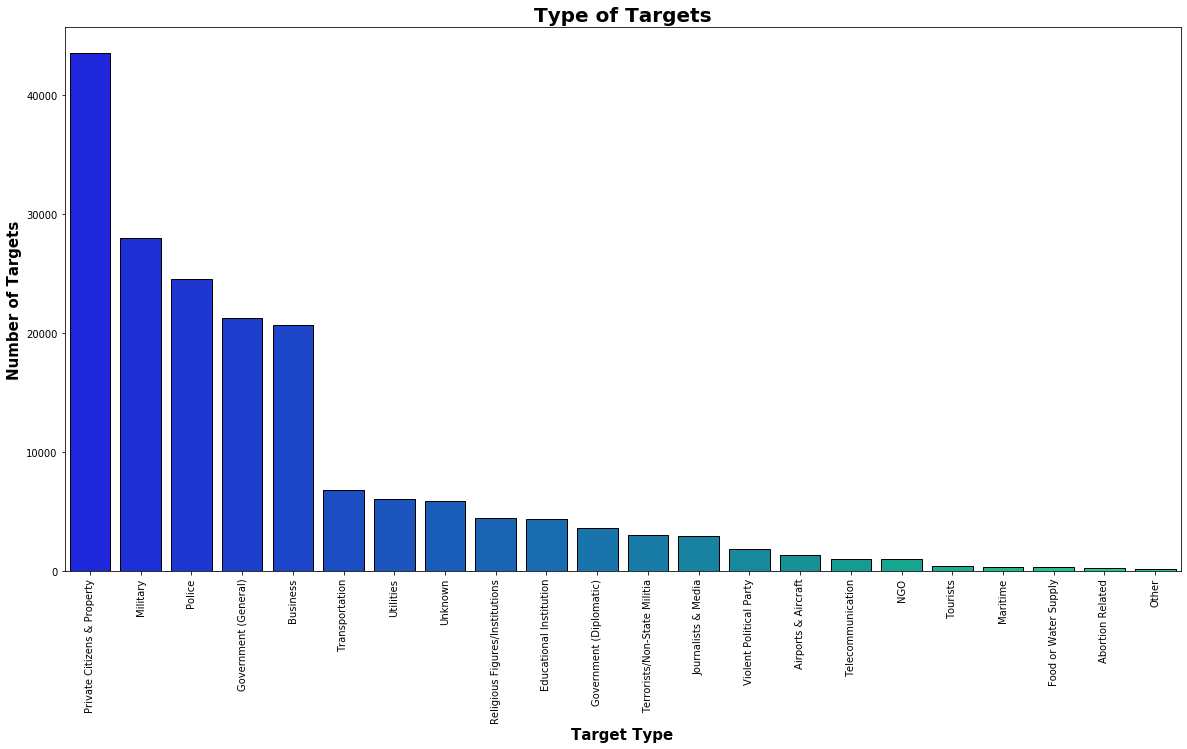

In [115]:
plt.figure(figsize = (20 , 10))
sns.countplot(df['Target_type'], order = df['Target_type'].value_counts().index, edgecolor = 'black', palette = 'winter')
plt.xlabel('Target Type', fontweight = 'bold', fontsize = 15)
plt.ylabel('Number of Targets', fontweight = 'bold', fontsize = 15)
plt.title('Type of Targets', fontweight = 'bold', fontsize = 20)
plt.xticks(rotation = 90)

Conclusion: It appears that Private Citizens & Property is type of target being most targeted, followed by Military, Police, and Government. 